In [1]:
!pip uninstall -y numpy pandas scipy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3


In [2]:
!pip install numpy==1.23.5 pandas==1.5.3 scipy==1.9.3 --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 162.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 209.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 203.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Successfully uninstalled python-dateutil-2.9.0.post0
ERROR: pip's dependenc

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/major_prjct_dataset

/content/drive/My Drive/Colab Notebooks/major_prjct_dataset


In [3]:
ls

wustl-ehms-2020_with_attacks_categories.csv


In [4]:
!pip install opacus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from opacus.accountants import RDPAccountant
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from opacus import PrivacyEngine

In [6]:
df = pd.read_csv("wustl-ehms-2020_with_attacks_categories.csv")

In [7]:
df.shape

(16318, 45)

In [8]:

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Display the categorical columns
print(categorical_cols.head())

     Dir        Flgs     SrcAddr     DstAddr  Sport             SrcMac  \
0     ->   e          10.0.1.172  10.0.1.150  58059  84:3a:4b:0f:5b:94   
1     ->   e          10.0.1.172  10.0.1.150  58062  84:3a:4b:0f:5b:94   
2     ->   e          10.0.1.172  10.0.1.150  58065  84:3a:4b:0f:5b:94   
3     ->   e          10.0.1.172  10.0.1.150  58067  84:3a:4b:0f:5b:94   
4     ->   e          10.0.1.172  10.0.1.150  58069  84:3a:4b:0f:5b:94   

              DstMac Attack Category  
0  b8:ca:3a:cf:0b:87          normal  
1  b8:ca:3a:cf:0b:87          normal  
2  b8:ca:3a:cf:0b:87          normal  
3  b8:ca:3a:cf:0b:87          normal  
4  b8:ca:3a:cf:0b:87          normal  


In [9]:
for col in categorical_cols:
    print(f"Unique values in '{col}' before encoding:\n", df[col].unique(), "\n")

Unique values in 'Dir' before encoding:
 ['   ->'] 

Unique values in 'Flgs' before encoding:
 [' e        ' ' M        ' ' eR       ' ' M *      ' ' e s      '
 ' M d      ' ' MR       '] 

Unique values in 'SrcAddr' before encoding:
 ['10.0.1.172'] 

Unique values in 'DstAddr' before encoding:
 ['10.0.1.150'] 

Unique values in 'Sport' before encoding:
 ['58059' '58062' '58065' ... '63918' '52345' '63969'] 

Unique values in 'SrcMac' before encoding:
 ['84:3a:4b:0f:5b:94' 'd8:9e:f3:95:02:75'] 

Unique values in 'DstMac' before encoding:
 ['b8:ca:3a:cf:0b:87'] 

Unique values in 'Attack Category' before encoding:
 ['normal' 'Data Alteration' 'Spoofing'] 



In [10]:

# Step 1: Remove NaN values and duplicate records
df = df.dropna().drop_duplicates()

In [11]:
df.drop(columns=["Attack Category"], inplace=True)

In [12]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Display the categorical columns
print(categorical_cols.head())

     Dir        Flgs     SrcAddr     DstAddr  Sport             SrcMac  \
0     ->   e          10.0.1.172  10.0.1.150  58059  84:3a:4b:0f:5b:94   
1     ->   e          10.0.1.172  10.0.1.150  58062  84:3a:4b:0f:5b:94   
2     ->   e          10.0.1.172  10.0.1.150  58065  84:3a:4b:0f:5b:94   
3     ->   e          10.0.1.172  10.0.1.150  58067  84:3a:4b:0f:5b:94   
4     ->   e          10.0.1.172  10.0.1.150  58069  84:3a:4b:0f:5b:94   

              DstMac  
0  b8:ca:3a:cf:0b:87  
1  b8:ca:3a:cf:0b:87  
2  b8:ca:3a:cf:0b:87  
3  b8:ca:3a:cf:0b:87  
4  b8:ca:3a:cf:0b:87  


In [13]:

# List of categorical columns
categorical_cols = ['Dir', 'Flgs', 'SrcAddr', 'DstAddr', 'Sport', 'SrcMac', 'DstMac']


In [14]:
# Apply LabelEncoder to each categorical column
label_encoders = {}  # Dictionary to store encoders for later use (if needed)
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()  # Create a LabelEncoder for each column
    df[col] = label_encoders[col].fit_transform(df[col])  # Transform categorical to numeric

# Display the transformed DataFrame
print(df.head())

   Dir  Flgs  SrcAddr  DstAddr  Sport  Dport  SrcBytes  DstBytes   SrcLoad  \
0    0     4        0        0   8850   1111       496       186  276914.0   
1    0     4        0        0   8853   1111       496       186  230984.0   
2    0     4        0        0   8856   1111       496       186  218470.0   
3    0     4        0        0   8858   1111       496       186  203376.0   
4    0     4        0        0   8860   1111       496       186  235723.0   

   DstLoad  ...  Packet_num  Temp  SpO2  Pulse_Rate  SYS  DIA  Heart_rate  \
0  92305.0  ...           1  28.9     0           0    0    0           0   
1  76995.0  ...           2  28.9     0           0    0    0          78   
2  72823.0  ...           3  28.9    89         104    0    0          78   
3  67792.0  ...           4  28.9    89         104    0    0          79   
4  78574.0  ...           5  28.9    89         101    0    0          79   

   Resp_Rate   ST  Label  
0          0  0.0      0  
1         17  

In [15]:
for col in categorical_cols:
    print(f"Unique values in '{col}' after encoding:\n", df[col].unique(), "\n")

Unique values in 'Dir' after encoding:
 [0] 

Unique values in 'Flgs' after encoding:
 [4 0 6 1 5 2 3] 

Unique values in 'SrcAddr' after encoding:
 [0] 

Unique values in 'DstAddr' after encoding:
 [0] 

Unique values in 'Sport' after encoding:
 [ 8850  8853  8856 ... 14697  3151 14748] 

Unique values in 'SrcMac' after encoding:
 [0 1] 

Unique values in 'DstMac' after encoding:
 [0] 



In [16]:

# Define X (features) and y (target)
X = df.drop(columns=['Label'])  # Drop the label column to keep only features
y = df['Label']  # Target variable

In [17]:

# Assuming X and y are your features and labels after preprocessing
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the new class distribution
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution after oversampling: Counter({0: 14272, 1: 14272})


In [18]:


# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the resampled data
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Convert back to a DataFrame
X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns)

# Print first 5 rows of the normalized data
print(X_resampled_scaled_df.head())

   Dir     Flgs  SrcAddr  DstAddr     Sport  Dport  SrcBytes  DstBytes  \
0  0.0  0.50213      0.0      0.0  0.170163    0.0 -0.029017 -0.101943   
1  0.0  0.50213      0.0      0.0  0.170816    0.0 -0.029017 -0.101943   
2  0.0  0.50213      0.0      0.0  0.171468    0.0 -0.029017 -0.101943   
3  0.0  0.50213      0.0      0.0  0.171903    0.0 -0.029017 -0.101943   
4  0.0  0.50213      0.0      0.0  0.172337    0.0 -0.029017 -0.101943   

    SrcLoad   DstLoad  ...  DstMac  Packet_num      Temp       SpO2  \
0  1.008075  0.453838  ...     0.0   -1.715600  2.262687 -70.582569   
1  0.547929  0.237774  ...     0.0   -1.715386  2.262687 -70.582569   
2  0.422558  0.178897  ...     0.0   -1.715171  2.262687  -6.240050   
3  0.271340  0.107896  ...     0.0   -1.714956  2.262687  -6.240050   
4  0.595406  0.260058  ...     0.0   -1.714742  2.262687  -6.240050   

   Pulse_Rate        SYS        DIA  Heart_rate  Resp_Rate        ST  
0  -10.804407 -19.640282 -14.720423  -11.519346  -2.93260

In [19]:


# kkkit the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split( X_resampled_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (22835, 43) (22835,)
Testing set shape: (5709, 43) (5709,)


In [20]:

# Step 7: Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Using .values to ensure numpy array
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

print("\nTensor shapes:")
print("X_train_tensor:", X_train_tensor.shape)
print("X_test_tensor:", X_test_tensor.shape)
print("y_train_tensor:", y_train_tensor.shape)
print("y_test_tensor:", y_test_tensor.shape)


Tensor shapes:
X_train_tensor: torch.Size([22835, 43])
X_test_tensor: torch.Size([5709, 43])
y_train_tensor: torch.Size([22835])
y_test_tensor: torch.Size([5709])


In [21]:
# Step 8: Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Verify DataLoader
for batch_X, batch_y in train_loader:
    print("\nFirst batch from DataLoader:")
    print("Batch X shape:", batch_X.shape)
    print("Batch y shape:", batch_y.shape)
    break


First batch from DataLoader:
Batch X shape: torch.Size([32, 43])
Batch y shape: torch.Size([32])


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.metrics import accuracy_score

# 1. Define the DNN Model (64 → 32 → 2) with Softmax output
class DNN(nn.Module):
    def __init__(self, input_dim=64): # Modified: Added input_dim argument with default value 64
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)  # Input layer (input_dim nodes) # Modified: Using input_dim
        self.fc2 = nn.Linear(32, 2)   # Output layer (2 nodes)
        self.dropout = nn.Dropout(0.1)  # 10% dropout

    def forward(self, x):
        x = F.relu(self.fc1(x))      # ReLU activation
        x = self.dropout(x)          # Regularization
        return F.softmax(self.fc2(x), dim=1)  # Softmax activation

In [23]:

# 2. Training Functions
def train_local_model(model, train_loader, epochs=50):
    device = next(model.parameters()).device
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    model.train()
    for epoch in range(epochs):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

    return model.state_dict()

In [24]:

def train_with_dp(model, train_loader, epochs=50, noise_scale=1.5):
    """Simplified DP training without Opacus"""
    weights = train_local_model(model, train_loader, epochs)
    # Add manual noise for DP
    noisy_weights = {k: v + torch.randn_like(v) * noise_scale for k, v in weights.items()}
    return noisy_weights, noise_scale  # Returning dummy epsilon

In [25]:
# 3. Federated Utilities
def aggregate_updates(global_model, client_weights, sample_counts):
    global_weights = global_model.state_dict()
    total_samples = sum(sample_counts)

    for key in global_weights:
        global_weights[key] = torch.stack(
            [client_weights[i][key] * sample_counts[i] for i in range(len(client_weights))]
        ).sum(dim=0) / total_samples

    return global_weights

def evaluate_model(model, test_loader):
    device = next(model.parameters()).device
    model.eval()
    all_labels, all_preds = [], []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            all_labels.extend(target.cpu().numpy())
            all_preds.extend(pred.cpu().numpy())

    return (
        accuracy_score(all_labels, all_preds),
        precision_score(all_labels, all_preds, average='binary'),
        recall_score(all_labels, all_preds, average='binary'),
        f1_score(all_labels, all_preds, average='binary'),
        confusion_matrix(all_labels, all_preds)
    )


In [26]:
def run_federated_learning(train_loader, test_loader, num_clients=2, num_rounds=100, use_dp=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = train_loader.dataset[0][0].shape[0]

    # Initialize models
    global_model = DNN(input_dim).to(device)
    client_models = [DNN(input_dim).to(device) for _ in range(num_clients)]

    # Split data among clients
    client_loaders = []
    client_size = len(train_loader.dataset) // num_clients
    for i in range(num_clients):
        indices = range(i * client_size,
                        (i + 1) * client_size if i != num_clients - 1 else len(train_loader.dataset))
        client_loaders.append(DataLoader(
            Subset(train_loader.dataset, indices),
            batch_size=32,
            shuffle=True
        ))

    client_epsilons = []  # Track final epsilon values

    # Training loop
    for round_num in range(num_rounds):
        print(f"\nRound {round_num + 1}/{num_rounds}")
        client_updates = []
        sample_counts = []

        for client_idx in range(num_clients):
            print(f"  Client {client_idx + 1}: Training...", end="")

            if use_dp:
                weights, epsilon = train_with_dp(client_models[client_idx], client_loaders[client_idx])
                if round_num == num_rounds - 1:  # Save only final round's epsilon
                    client_epsilons.append(epsilon)
            else:
                weights = train_local_model(client_models[client_idx], client_loaders[client_idx])


            client_updates.append(weights)
            sample_counts.append(len(client_loaders[client_idx].dataset))

        # Aggregate updates
        global_weights = aggregate_updates(global_model, client_updates, sample_counts)
        global_model.load_state_dict(global_weights)

        # Sync client models
        for model in client_models:
            model.load_state_dict(global_model.state_dict())

    # Final evaluation
    accuracy, precision, recall, f1, cm = evaluate_model(global_model, test_loader)

    # Display final metrics
    print(f"\nFinal Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


    # Display final privacy budgets
    if use_dp:
        print("\nFinal Privacy Budgets (ε) per client:")
        for idx, eps in enumerate(client_epsilons):
            print(f"Client {idx + 1}: ε = {eps:.4f}")

    # Visualize confusion matrix

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    return global_model


Starting Federated Learning...

Round 1/100
  Client 1: Training...  Client 2: Training...
Round 2/100
  Client 1: Training...  Client 2: Training...
Round 3/100
  Client 1: Training...  Client 2: Training...
Round 4/100
  Client 1: Training...  Client 2: Training...
Round 5/100
  Client 1: Training...  Client 2: Training...
Round 6/100
  Client 1: Training...  Client 2: Training...
Round 7/100
  Client 1: Training...  Client 2: Training...
Round 8/100
  Client 1: Training...  Client 2: Training...
Round 9/100
  Client 1: Training...  Client 2: Training...
Round 10/100
  Client 1: Training...  Client 2: Training...
Round 11/100
  Client 1: Training...  Client 2: Training...
Round 12/100
  Client 1: Training...  Client 2: Training...
Round 13/100
  Client 1: Training...  Client 2: Training...
Round 14/100
  Client 1: Training...  Client 2: Training...
Round 15/100
  Client 1: Training...  Client 2: Training...
Round 16/100
  Client 1: Training...  Client 2: Training...
Round 17/100
  Cl

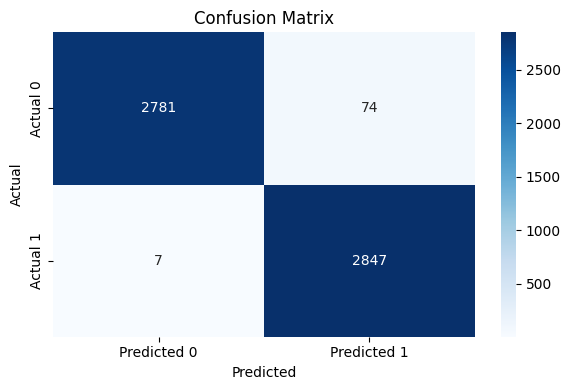

In [27]:

# 5. Execute Federated Learning
print("Starting Federated Learning...")
global_model = run_federated_learning(
    train_loader,  # From your preprocessing
    test_loader,   # From your preprocessing
    num_clients=2,
    num_rounds=100,
    use_dp=True     # Set to False to disable DP
)